In [10]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.classify import NaiveBayesClassifier
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import time

In [11]:
trump_speech_df = pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Project 5/TrumpSpeech/MrTrumpSpeeches.csv',error_bad_lines=False, warn_bad_lines=False,header=0, delimiter="\~", quoting=3, engine='python')
# trump_speech_df.head()
start_time = time.time()
def remove_nextline(text):
#     text = (re.sub("\n"," ",text).lower())
    return re.sub("[^a-zA-Z]"," ", text).lower()

trump_speech_df['subtitle1'] = trump_speech_df['subtitles'].apply(remove_nextline)

trump_speech_df['tokenized_subtitle'] = trump_speech_df['subtitle1'].apply(word_tokenize)
stopset = stopwords.words('english') + list(string.punctuation)
trump_speech_df['subtitle_stop']=trump_speech_df['tokenized_subtitle'] .apply(lambda x: [item for item in x if item not in stopset])
trump_speech_df.sort_values('upload_date')
lemmatizer = WordNetLemmatizer()
trump_speech_df['subtitle_lemma']=trump_speech_df['subtitle_stop'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
def func(row):
    return " ".join(row)
trump_speech_df['data'] = trump_speech_df['subtitle_lemma'].apply(lambda x: func(x))
trump_speech_df.head()
print("--- %s seconds ---" % (time.time() - start_time))

--- 17.281900882720947 seconds ---


In [12]:
start_time = time.time()
def polarity(row):
    return TextBlob(row).sentiment.polarity
trump_speech_df['Polarity'] = trump_speech_df['data'].apply(lambda x: polarity(x))
def subjectivity(row):
    return TextBlob(row).sentiment.subjectivity
trump_speech_df['Subjectivity'] = trump_speech_df['data'].apply(lambda x: subjectivity(x))
print(trump_speech_df.head())
print("--- %s seconds ---" % (time.time() - start_time))

            id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events     20160220   
1  -64nfy6i58w  Donald Trump Speeches & Events     20161107   
2  -7Sp31hTxkU  Donald Trump Speeches & Events     20160423   
3  -byuyavcNI4  Donald Trump Speeches & Events     20160617   
4  09BXh-AA72M  Donald Trump Speeches & Events     20161105   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston, Te...     15138.0   
4  Full Speech: Donald Trump Rally in Denver, Col...      8720.0   

   average_rating  like_count  dislike_count  \
0        4.259259        44.0           10.0   
1        4.358025       952.0          182.0   
2        4.666667       220.0           20.0   
3        4.582491   

In [30]:
start_time = time.time()
def p_pos(row):
    return TextBlob(row,analyzer=NaiveBayesAnalyzer()).sentiment.p_pos
trump_speech_df['p_pos'] = trump_speech_df['data'].apply(lambda x: p_pos(x))
print(trump_speech_df.head())
print("--- %s seconds ---" % (time.time() - start_time))

            id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events     20160220   
1  -64nfy6i58w  Donald Trump Speeches & Events     20161107   
2  -7Sp31hTxkU  Donald Trump Speeches & Events     20160423   
3  -byuyavcNI4  Donald Trump Speeches & Events     20160617   
4  09BXh-AA72M  Donald Trump Speeches & Events     20161105   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston, Te...     15138.0   
4  Full Speech: Donald Trump Rally in Denver, Col...      8720.0   

   average_rating  like_count  dislike_count  \
0        4.259259        44.0           10.0   
1        4.358025       952.0          182.0   
2        4.666667       220.0           20.0   
3        4.582491   

In [31]:
start_time = time.time()
def p_neg(row):
    return TextBlob(row,analyzer=NaiveBayesAnalyzer()).sentiment.p_neg
trump_speech_df['p_neg'] = trump_speech_df['data'].apply(lambda x: p_neg(x))
print(trump_speech_df.head())
print("--- %s seconds ---" % (time.time() - start_time))

            id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events     20160220   
1  -64nfy6i58w  Donald Trump Speeches & Events     20161107   
2  -7Sp31hTxkU  Donald Trump Speeches & Events     20160423   
3  -byuyavcNI4  Donald Trump Speeches & Events     20160617   
4  09BXh-AA72M  Donald Trump Speeches & Events     20161105   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston, Te...     15138.0   
4  Full Speech: Donald Trump Rally in Denver, Col...      8720.0   

   average_rating  like_count  dislike_count  \
0        4.259259        44.0           10.0   
1        4.358025       952.0          182.0   
2        4.666667       220.0           20.0   
3        4.582491   

In [39]:
start_time = time.time()
print("Average Polarity throughout: ",(trump_speech_df['Polarity'].mean()))
print("Minimum Polarity throughout: ",(trump_speech_df['Polarity'].min()))
print("Maximum Polarity throughout: ",(trump_speech_df['Polarity'].max()))
print("Median Polarity throughout: ",(np.median(trump_speech_df['Polarity'])))
print("Standard Devidation Polarity throughout: ",(np.std(trump_speech_df['Polarity'])))
print("--- %s seconds ---" % (time.time() - start_time))

Average Polarity throughout:  0.16046278765175803
Minimum Polarity throughout:  -0.360227272727
Maximum Polarity throughout:  0.761904761905
Median Polarity throughout:  0.155204033633
Standard Devidation Polarity throughout:  0.09687012183525308
--- 0.0030083656311035156 seconds ---


In [40]:
start_time = time.time()
print("Average Subjectivity throughout: ",(trump_speech_df['Subjectivity'].mean()))
print("Minimum Subjectivity throughout: ",(trump_speech_df['Subjectivity'].min()))
print("Maximum Subjectivity throughout: ",(trump_speech_df['Subjectivity'].max()))
print("Median Subjectivity throughout: ",(np.median(trump_speech_df['Subjectivity'])))
print("Standard Devidation Subjectivity throughout: ",(np.std(trump_speech_df['Subjectivity'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average p_pos throughout: ",(trump_speech_df['p_pos'].mean()))
print("Minimum p_pos throughout: ",(trump_speech_df['p_pos'].min()))
print("Maximum p_pos throughout: ",(trump_speech_df['p_pos'].max()))
print("Median p_pos throughout: ",(np.median(trump_speech_df['p_pos'])))
print("Standard Devidation p_pos throughout: ",(np.std(after_df['p_pos'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average p_neg throughout: ",(trump_speech_df['p_neg'].mean()))
print("Minimum p_neg throughout: ",(trump_speech_df['p_neg'].min()))
print("Maximum p_neg throughout: ",(trump_speech_df['p_neg'].max()))
print("Median p_neg throughout: ",(np.median(trump_speech_df['p_neg'])))
print("Standard Devidation p_neg throughout: ",(np.std(after_df['p_neg'])))
print("--- %s seconds ---" % (time.time() - start_time))

Average Subjectivity throughout:  0.4641974228401499
Minimum Subjectivity throughout:  0.0
Maximum Subjectivity throughout:  0.787142857143
Median Subjectivity throughout:  0.474782412913
Standard Devidation Subjectivity throughout:  0.08015250761739105
--- 0.002506256103515625 seconds ---
Average p_pos throughout:  0.9822192913799279
Minimum p_pos throughout:  0.0244693349314
Maximum p_pos throughout:  1.0
Median p_pos throughout:  1.0
Standard Devidation p_pos throughout:  0.1288123241329063
--- 0.0020067691802978516 seconds ---
Average p_neg throughout:  0.01778070862007273
Minimum p_neg throughout:  1.48773320174e-110
Maximum p_neg throughout:  0.975530665069
Median p_neg throughout:  2.11647906828e-21
Standard Devidation p_neg throughout:  0.12881232413290658
--- 0.0010023117065429688 seconds ---


In [33]:
bins = [20160201,20170120,20170803]
trump_speech_df['binned'] = pd.cut(trump_speech_df['upload_date'], bins,labels=['Before elected as President','Elected as President'])
trump_speech_df['binned'].unique()

[Before elected as President, Elected as President, NaN]
Categories (2, object): [Before elected as President < Elected as President]

In [34]:
before_df = trump_speech_df.loc[trump_speech_df['binned'] == 'Elected as President']
before_df.shape

(374, 19)

In [35]:
after_df = trump_speech_df.loc[trump_speech_df['binned'] == 'Before elected as President']
after_df.shape

(460, 19)

In [36]:
after_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data,Polarity,Subjectivity,binned,p_pos,p_neg
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...,0.328868,0.537985,Before elected as President,1.0,6.263755e-17
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...,0.189753,0.501795,Before elected as President,1.0,2.036198e-30
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...,0.178542,0.538970,Before elected as President,1.0,1.363365e-52
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...,0.232798,0.541103,Before elected as President,1.0,2.519831e-24
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...,0.142178,0.504684,Before elected as President,1.0,4.722129e-40


In [37]:
start_time = time.time()
print("Average Polarity after: ",(after_df['Polarity'].mean()))
print("Minimum Polarity after: ",(after_df['Polarity'].min()))
print("Maximum Polarity after: ",(after_df['Polarity'].max()))
print("Median Polarity after: ",(np.median(after_df['Polarity'])))
print("Standard Devidation Polarity after: ",(np.std(after_df['Polarity'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average Subjectivity after: ",(after_df['Subjectivity'].mean()))
print("Minimum Subjectivity after: ",(after_df['Subjectivity'].min()))
print("Maximum Subjectivity after: ",(after_df['Subjectivity'].max()))
print("Median Subjectivity after: ",(np.median(after_df['Subjectivity'])))
print("Standard Devidation Subjectivity after: ",(np.std(after_df['Subjectivity'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average p_pos after: ",(after_df['p_pos'].mean()))
print("Minimum p_pos after: ",(after_df['p_pos'].min()))
print("Maximum p_pos after: ",(after_df['p_pos'].max()))
print("Median p_pos after: ",(np.median(after_df['p_pos'])))
print("Standard Devidation p_pos after: ",(np.std(after_df['p_pos'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average p_neg after: ",(after_df['p_neg'].mean()))
print("Minimum p_neg after: ",(after_df['p_neg'].min()))
print("Maximum p_neg after: ",(after_df['p_neg'].max()))
print("Median p_neg after: ",(np.median(after_df['p_neg'])))
print("Standard Devidation p_neg after: ",(np.std(after_df['p_neg'])))
print("--- %s seconds ---" % (time.time() - start_time))

Average Polarity after:  0.1664864297740423
Minimum Polarity after:  -0.360227272727
Maximum Polarity after:  0.761904761905
Median Polarity after:  0.157347752252
Standard Devidation Polarity after:  0.09685725627231355
--- 0.0020058155059814453 seconds ---
Average Subjectivity after:  0.48015460538605215
Minimum Subjectivity after:  0.0
Maximum Subjectivity after:  0.787142857143
Median Subjectivity after:  0.492954319274
Standard Devidation Subjectivity after:  0.07795320125045284
--- 0.0020058155059814453 seconds ---
Average p_pos after:  0.9731236607932354
Minimum p_pos after:  0.0244693349314
Maximum p_pos after:  1.0
Median p_pos after:  1.0
Standard Devidation p_pos after:  0.1288123241329063
--- 0.001001596450805664 seconds ---
Average p_neg after:  0.026876339206765788
Minimum p_neg after:  1.48773320174e-110
Maximum p_neg after:  0.975530665069
Median p_neg after:  1.83354643405e-32
Standard Devidation p_neg after:  0.12881232413290658
--- 0.0010027885437011719 seconds ---


In [38]:
start_time = time.time()
print("Average Polarity before: ",(before_df['Polarity'].mean()))
print("Minimum Polarity before: ",(before_df['Polarity'].min()))
print("Maximum Polarity before: ",(before_df['Polarity'].max()))
print("Median Polarity before: ",(np.median(before_df['Polarity'])))
print("Standard Devidation Polarity before: ",(np.std(before_df['Polarity'])))
print("")
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average Subjectivity before: ",(before_df['Subjectivity'].mean()))
print("Minimum Subjectivity before: ",(before_df['Subjectivity'].min()))
print("Maximum Subjectivity before: ",(before_df['Subjectivity'].max()))
print("Median Subjectivity before: ",(np.median(before_df['Subjectivity'])))
print("Standard Devidation Subjectivity before: ",(np.std(before_df['Subjectivity'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average p_pos before: ",(before_df['p_pos'].mean()))
print("Minimum p_pos before: ",(before_df['p_pos'].min()))
print("Maximum p_pos before: ",(before_df['p_pos'].max()))
print("Median p_pos before: ",(np.median(before_df['p_pos'])))
print("Standard Devidation p_pos before: ",(np.std(before_df['p_pos'])))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("Average p_neg before: ",(before_df['p_neg'].mean()))
print("Minimum p_neg before: ",(before_df['p_neg'].min()))
print("Maximum p_neg before: ",(before_df['p_neg'].max()))
print("Median p_neg before: ",(np.median(before_df['p_neg'])))
print("Standard Devidation p_neg before: ",(np.std(before_df['p_neg'])))
print("--- %s seconds ---" % (time.time() - start_time))

Average Polarity before:  0.15279968122615417
Minimum Polarity before:  -0.261538461538
Maximum Polarity before:  0.518333333333
Median Polarity before:  0.149736293033
Standard Devidation Polarity before:  0.09654577062757692

--- 0.002005338668823242 seconds ---
Average Subjectivity before:  0.4442516370468395
Minimum Subjectivity before:  0.0
Maximum Subjectivity before:  0.628205128205
Median Subjectivity before:  0.447726130351
Standard Devidation Subjectivity before:  0.07844703796199964
--- 0.0025064945220947266 seconds ---
Average p_pos before:  0.9933113466008862
Minimum p_pos before:  0.250247740833
Maximum p_pos before:  1.0
Median p_pos before:  1.0
Standard Devidation p_pos before:  0.057437636262447994
--- 0.0020058155059814453 seconds ---
Average p_neg before:  0.006688653399113735
Minimum p_neg before:  2.67149389374e-93
Maximum p_neg before:  0.749752259167
Median p_neg before:  1.07339457963e-13
Standard Devidation p_neg before:  0.057437636262448376
--- 0.00200510025

In [32]:
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data,Polarity,Subjectivity,binned,p_pos,p_neg
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...,0.328868,0.537985,Before elected as President,1.0,6.263755e-17
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...,0.189753,0.501795,Before elected as President,1.0,2.036198e-30
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...,0.178542,0.538970,Before elected as President,1.0,1.363365e-52
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...,0.232798,0.541103,Before elected as President,1.0,2.519831e-24
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...,0.142178,0.504684,Before elected as President,1.0,4.722129e-40


In [41]:
start_time = time.time()
def classification(row):
    return TextBlob(row,analyzer=NaiveBayesAnalyzer()).sentiment.classification
trump_speech_df['Classification'] = trump_speech_df['data'].apply(lambda x: classification(x))
print(trump_speech_df.head())
print("--- %s seconds ---" % (time.time() - start_time))

            id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events     20160220   
1  -64nfy6i58w  Donald Trump Speeches & Events     20161107   
2  -7Sp31hTxkU  Donald Trump Speeches & Events     20160423   
3  -byuyavcNI4  Donald Trump Speeches & Events     20160617   
4  09BXh-AA72M  Donald Trump Speeches & Events     20161105   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston, Te...     15138.0   
4  Full Speech: Donald Trump Rally in Denver, Col...      8720.0   

   average_rating  like_count  dislike_count  \
0        4.259259        44.0           10.0   
1        4.358025       952.0          182.0   
2        4.666667       220.0           20.0   
3        4.582491   

In [43]:
trump_speech_df['Classification'].value_counts()

pos    823
neg     13
Name: Classification, dtype: int64

In [44]:
trump_speech_df['title'].value_counts()

FULL SPEECH: President Donald Trump Battle of the Coral Sea Speech Commemorating 75th Anniversary       2
WATCH: President Donald Trump Press Conference with Angela Merkel (3/17/2017)                           2
FULL: President Donald Trump Joint Press Conference with Israeli Prime Minister Benjamin Netanyahu      1
Donald Trump Rally in Waukesha, Wisconsin                                                               1
Sarah Palin Speech at Donald Trump Rally in San Diego California                                        1
Full Event: Donald Trump Rally in Henderson, Nevada (10/5/2016) Trump Henderson Nevada Speech           1
WATCH: President Donald Trump Addresses the Nation 6/16/17                                              1
Donald Trump To U.N. Security Council Diplomats: Remove ‘BlindFolds’ On North Korea | NBC News          1
Russian Spy Targeted Former Donald Trump Adviser Carter Page | TODAY                                    1
LIVE Donald Trump Columbus Ohio Signature Flig

In [45]:
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data,Polarity,Subjectivity,binned,p_pos,p_neg,Classification
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...,0.328868,0.537985,Before elected as President,1.0,6.263755e-17,pos
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...,0.189753,0.501795,Before elected as President,1.0,2.036198e-30,pos
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...,0.178542,0.538970,Before elected as President,1.0,1.363365e-52,pos
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...,0.232798,0.541103,Before elected as President,1.0,2.519831e-24,pos
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...,0.142178,0.504684,Before elected as President,1.0,4.722129e-40,pos


In [47]:
trump_speech_df['playlist'].value_counts()

Donald Trump Rally Speech Events Press Conference Rallies Playlist    369
President Donald Trump's First 100 Days | NBC News                    233
Donald Trump Speeches & Events                                        135
DONALD TRUMP SPEECHES & PRESS CONFERENCE                               77
President Donald Trump Weekly Address 2017                             22
Name: playlist, dtype: int64

In [48]:
bins = [20160201, 20160720, 20161108, 20170119, 20170120,20170803]
trump_speech_df['binned'] = pd.cut(trump_speech_df['upload_date'], bins,labels=['RNC-campaign','Presidential Campaign','President-Elected','Inaugural-Day','President'])
trump_speech_df['binned'].unique()

[RNC-campaign, Presidential Campaign, President-Elected, Inaugural-Day, President, NaN]
Categories (5, object): [RNC-campaign < Presidential Campaign < President-Elected < Inaugural-Day < President]

In [50]:
frequency=pd.DataFrame(trump_speech_df['binned'].value_counts())

In [51]:
frequency.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A0D7929EB8>]], dtype=object)

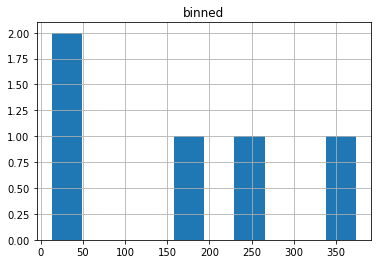

In [52]:
plt.show()

In [66]:
frequency
y1={"President","Presidential Campaign","RNC-campaign","Inaugural-Day","President-Elected"}

In [67]:
import seaborn as sns
sns.countplot(x=y1, data=frequency['binned'], palette="Greens_d");
plt.show()

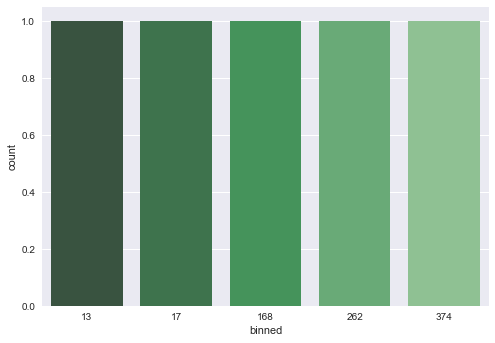